# Analysis of Network System for Optimal Scheduling in the Assembly of an Automobile Engine 

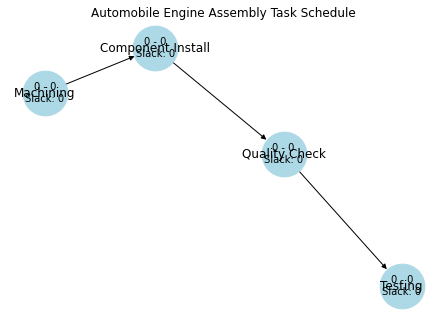

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph representing task dependencies
G = nx.DiGraph()

# Adding nodes (tasks)
tasks = [
    ("Machining", {"duration": 3}),
    ("Component Install", {"duration": 2}),
    ("Quality Check", {"duration": 1}),
    ("Testing", {"duration": 2})
]

G.add_nodes_from(tasks)

# Adding edges (dependencies) with task durations
dependencies = [
    ("Machining", "Component Install", {"duration": 0}),  # Duration between Machining and Component Install
    ("Component Install", "Quality Check", {"duration": 0}),  # Duration between Component Install and Quality Check
    ("Quality Check", "Testing", {"duration": 0})  # Duration between Quality Check and Testing
]

G.add_edges_from(dependencies)

# Calculate earliest start times using dynamic programming and topological sorting
earliest_times = {}
for node in nx.topological_sort(G):
    if G.in_degree(node) == 0:
        earliest_times[node] = 0
    else:
        earliest_times[node] = max(earliest_times[parent] + G[parent][node]['duration'] for parent in G.predecessors(node))

# Calculate latest start times by subtracting task durations from the project duration
project_duration = max(earliest_times.values())
latest_times = {task: project_duration - earliest_times[task] for task in G.nodes}

# Calculate slack time
slack_times = {task: latest_times[task] - earliest_times[task] for task in G.nodes}

# Plot the graph with task names, earliest times, latest times, and slack times
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue')

labels = {task: f"{earliest_times[task]} - {latest_times[task]}\nSlack: {slack_times[task]}" for task in G.nodes}
nx.draw_networkx_labels(G, pos, labels, font_size=10, font_color='black')

plt.title("Automobile Engine Assembly Task Schedule")
plt.show()
